In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

In [3]:
#loading dataset
df = pd.read_csv("C:/Users/ABHISHEK KUMAR/Desktop/New folder/Bengaluru_House_Data.csv")

In [4]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8808,Built-up Area,Ready To Move,Bhoganhalli,2 BHK,Tenceen,1125,2.0,1.0,54.0
8047,Super built-up Area,Ready To Move,Thanisandra,2 BHK,Inulat,1200,2.0,3.0,60.0
8020,Super built-up Area,22-May,Jakkur,4 BHK,SoineC,2249.81 - 4112.19,NaN,NaN,229.0
12668,Super built-up Area,22-Jan,Vajarahalli,3 BHK,NaN,1432,3.0,2.0,79.0
11760,Built-up Area,Ready To Move,Maheswari Nagar,2 BHK,AsensGa,1000,2.0,2.0,60.0


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
(df.isnull().sum() / df.shape[0]) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
#since society have 41% missing value so this feature will get droped
df.drop(columns=['society'],inplace=True)


In [11]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [12]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

<h1>Analysis of each column seperately:</h1>

<h2>Analysis of area_type column:</h2>

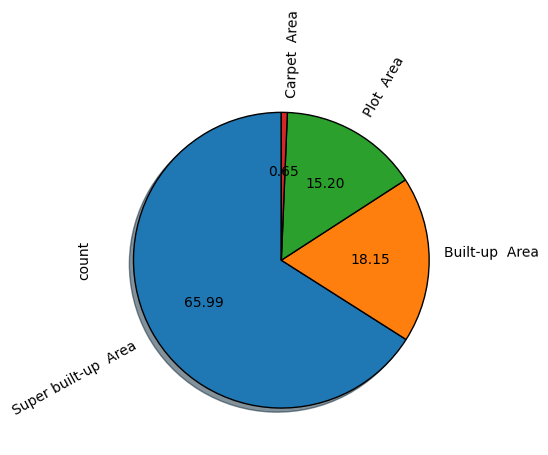

In [13]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

In [14]:
df.drop(columns=['area_type'],inplace=True)

<h2>Analysis of availability column:</h2>

In [15]:
df.shape

(13320, 7)

In [16]:
(df['availability'].value_counts()/df.shape[0])*100

availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
16-Oct            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64

In [17]:
df.isnull().sum()

availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [18]:
df.drop(columns=['availability'],inplace=True)

In [19]:
df.tail()

,location,size,total_sqft,bath,balcony,price
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.0
13316,Richards Town,4 BHK,3600,5.0,NaN,400.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.0
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.0
13319,Doddathoguru,1 BHK,550,1.0,1.0,17.0


<h2>Analysis of location column:</h2>

In [20]:
df['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [21]:
df['location'].isna().sum()

np.int64(1)

In [22]:
#filling missing value with mode
df['location'] = df['location'].fillna('Whitefield')

In [23]:
df['location'].nunique()

1305

In [24]:
location_counts = df['location'].value_counts()

In [25]:
len(location_counts[location_counts<=10])

1064

In [26]:
len(location_counts[location_counts>10])

241

In [27]:
# There are 1064 locations with 10 or fewer occurrences.
# To reduce the number of unique categories, these locations will be grouped under a new category named "other".
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [28]:
df['location'].nunique()

242

now there are only 242 categories 

In [29]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
6024,Kasavanhalli,2 BHK,1105,2.0,2.0,42.0
4374,Banashankari Stage II,3 BHK,1500,2.0,1.0,120.0
7301,Sarjapur Road,2 BHK,1350,2.0,2.0,68.0


<h2>Analysis of size column:</h2>

In [30]:
df['size'].isnull().sum()

np.int64(16)

In [31]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [32]:
# filling missing value with 2 BHK
df['size'] = df['size'].fillna('2 BHK')

In [33]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The 'size' column contains two types of categories: 'Bedroom' and 'BHK'.<br>
To ensure consistency, this needs to be standardized.<br>
making a new column BHK 

In [34]:
df['BHK'] = df['size'].str.split(' ').str[0].astype(int)

In [35]:
df['BHK'].value_counts()

BHK
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

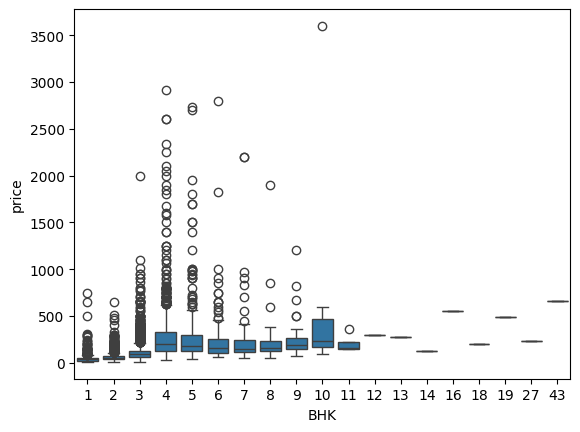

In [36]:
sns.boxplot(x=df['BHK'],y=df['price'])
plt.show()

In [37]:
df.drop(columns=['size'],inplace=True)

In [38]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
4681,Whitefield,2700,5.0,2.0,175.0,3
12365,Domlur,1650,3.0,1.0,180.0,3
5776,Akshaya Nagar,1126,2.0,1.0,55.0,2
9956,other,1210,2.0,0.0,75.0,2
2393,Singasandra,1100,2.0,1.0,52.0,2


<h2> Analysis of total_sqft column:</h2>

In [39]:
df['total_sqft'].nunique()

2117

In [40]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [41]:
# there are few values in ranges 
def convert_ranges_to_sqft(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [42]:
df['total_sqft'] = df['total_sqft'].apply(convert_ranges_to_sqft)

In [43]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK
2859,Basavangudi,1036.0,2.0,2.0,105.00,2
9132,Uttarahalli,1330.0,2.0,2.0,46.55,3
5871,Anekal,997.0,3.0,2.0,55.00,3


<h4>creating a new columns price per sqft because it's a very important feature in real state:</h4>

In [44]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [45]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [46]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [47]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9604,Banashankari,1020.0,2.0,1.0,42.83,2,4199.019608
6586,Electronics City Phase 1,360.0,1.0,0.0,16.90,1,4694.444444
1308,KR Puram,1100.0,2.0,1.0,47.00,2,4272.727273


<h2>Analysis of bath column:</h2>

In [48]:
df['bath'].nunique()

19

In [49]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: count, dtype: int64

In [50]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [51]:
df['bath'].isnull().sum()

np.int64(73)

In [52]:
#filling missing value with median
df['bath'] = df['bath'].fillna(df['bath'].median())

<Axes: xlabel='bath', ylabel='count'>

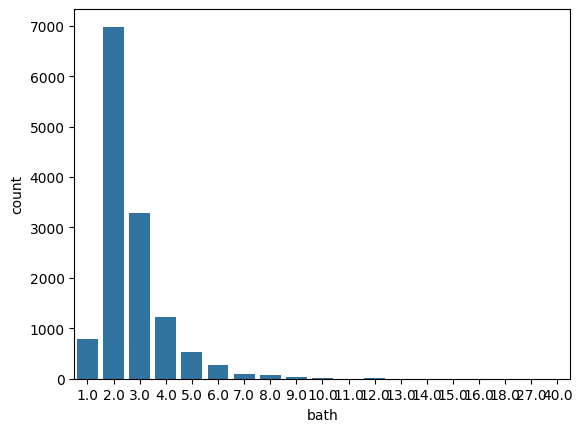

In [53]:
sns.countplot(x=df['bath'])

In [54]:
df.isnull().sum()

location            0
total_sqft         46
bath                0
balcony           609
price               0
BHK                 0
price_per_sqft     46
dtype: int64

This column contains outliers, which will be handled later.

In [55]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
7724,other,375.0,1.0,0.0,26.0,1,6933.333333
10951,Bannerghatta Road,1154.0,2.0,2.0,47.0,2,4072.790295
6305,Electronic City,1070.0,2.0,1.0,47.0,2,4392.523364


<h2>Analysis of balcony column:</h2>

In [56]:
df['balcony'].nunique()

4

In [57]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [58]:
df['balcony'].isnull().sum()

np.int64(609)

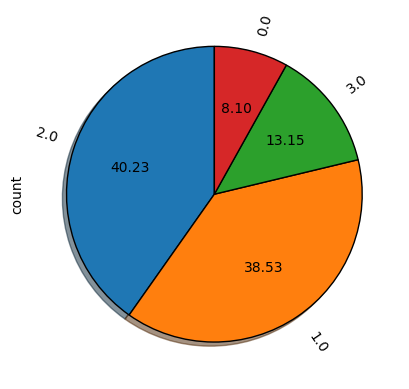

In [59]:
df['balcony'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

In [60]:
df.drop(columns=['balcony'],inplace=True)

In [61]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
5469,Ulsoor,36000.0,4.0,450.0,4,1250.000000
8613,other,900.0,2.0,45.0,2,5000.000000
8376,Sarjapur Road,1262.0,2.0,67.0,2,5309.033281


<h4># The analysis of all columns is complete. Next, the focus will be on detecting and removing outliers.
</h4>

<h1>Outlier's detection and removal</h1>

In [62]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
10220,other,1220.0,2.0,56.0,2,4590.163934
2789,Kanakpura Road,1500.0,3.0,97.0,3,6466.666667
11923,other,2200.0,2.0,190.0,3,8636.363636


In [63]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<h2>outlier's of total_sqft column :</h2>

let's see area per BHK:

In [64]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [65]:
# in 1BHK area should be >= 300 so removing rows in area per BHK is less than 300
df = df[(df['total_sqft']/df['BHK']) >= 300]

In [66]:
df.shape

(12530, 6)

In [67]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


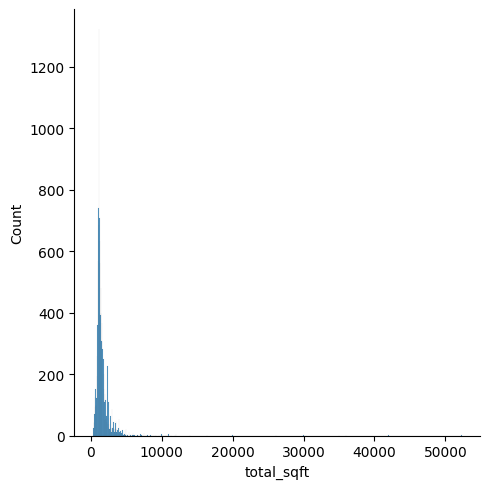

In [68]:
sns.displot(x=df['total_sqft'])

In [69]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
5040,Budigere,1139.0,2.0,60.0,2,5267.778753
13307,Billekahalli,1805.0,3.0,134.0,3,7423.822715
8396,Hosur Road,1689.0,3.0,103.0,3,6098.283008


<h2>Outlier's of price_per_sqft:</h2>

In [70]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [71]:
#seeing price_per_sqft location wise
df.groupby('location')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
1st Block Jayanagar,10.0,12359.253758,3931.939592,6000.000000,11100.460123,12258.569501,15018.022329,18750.000000
1st Phase JP Nagar,23.0,9726.405918,4802.127570,5274.725275,7170.133907,8425.613866,9901.259524,25000.000000
2nd Phase Judicial Layout,11.0,4048.701183,674.730658,3500.000000,3500.000000,3500.000000,4739.316239,5000.000000
2nd Stage Nagarbhavi,9.0,14381.275720,5272.435848,5666.666667,14666.666667,15033.333333,18750.000000,20416.666667
...,...,...,...,...,...,...,...,...
Yelahanka,208.0,5177.606819,1761.479589,371.428571,4290.940767,5012.513762,5859.524889,19875.776398
Yelahanka New Town,38.0,5860.659870,3889.233175,1875.000000,3776.785714,5040.025016,5413.853463,22475.000000
Yelenahalli,13.0,4012.550871,533.259531,3125.000000,3800.000000,3835.625000,4121.212121,5176.876618


For each location group, price_per_sqft will be kept within the range [mean - standard deviation, mean + standard deviation].

In [72]:
#function to kept price_per_sqft in range
def remove_price_per_sqft_outliers(df):
    temp_df = pd.DataFrame()
    for location,sub_df in df.groupby('location'):
        mean = sub_df['price_per_sqft'].mean()
        std_dev = sub_df['price_per_sqft'].std()
        
        filtered_df = sub_df[(sub_df['price_per_sqft'] >= mean-std_dev) & (sub_df['price_per_sqft'] <= mean+std_dev)]
        temp_df = pd.concat([temp_df,filtered_df],ignore_index=True)
    return temp_df
df = remove_price_per_sqft_outliers(df)

In [73]:
df['price_per_sqft'].describe()

count    10353.000000
mean      5660.848288
std       2270.910791
min       1250.000000
25%       4239.631336
50%       5175.600739
75%       6432.748538
max      24509.803922
Name: price_per_sqft, dtype: float64

In [74]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
3805,KR Puram,1200.0,2.0,47.00,2,3916.666667
8010,Yeshwanthpur,1384.0,2.0,76.18,3,5504.335260


<h2>Outlier's of BHK column:</h2>

<Axes: xlabel='BHK', ylabel='count'>

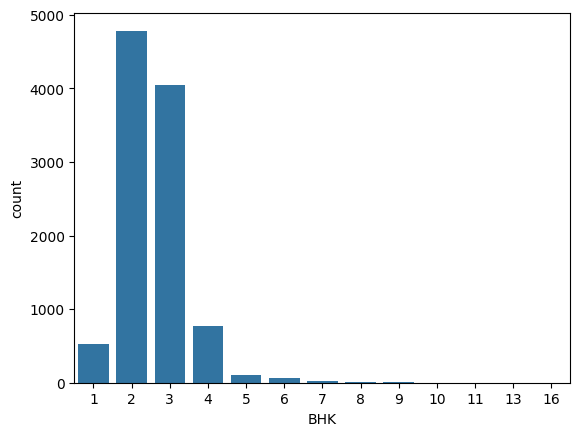

In [75]:
sns.countplot(x=df['BHK'])

<Axes: xlabel='BHK'>

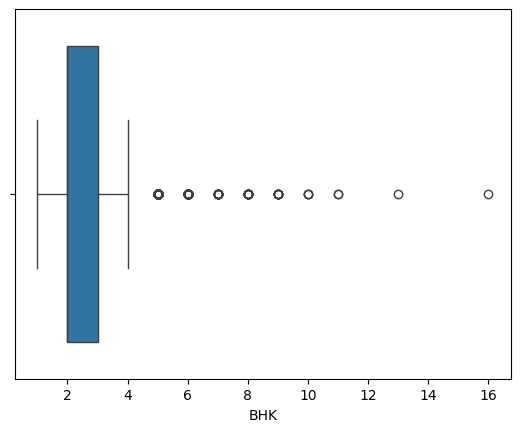

In [76]:
sns.boxplot(x=df['BHK'])

Houses with more than 7 BHK are uncommon, so they will be removed from the dataset.

In [77]:
df = df[df['BHK'] <= 7].copy()

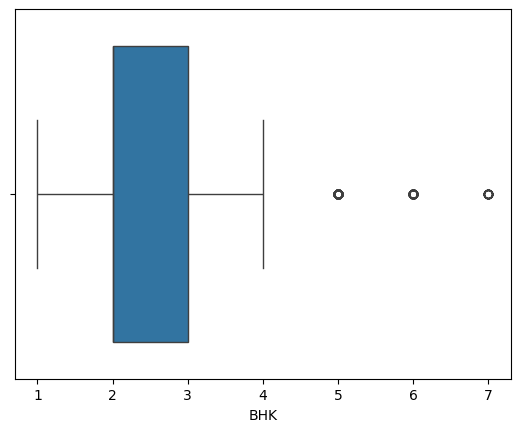

In [78]:
sns.boxplot(x=df['BHK'])
plt.show()

In [79]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
9921,other,1798.0,3.0,73.0,3,4060.066741
1930,Electronic City,1128.0,2.0,65.0,2,5762.411348


<h2>Outlier's of bath column:</h2>

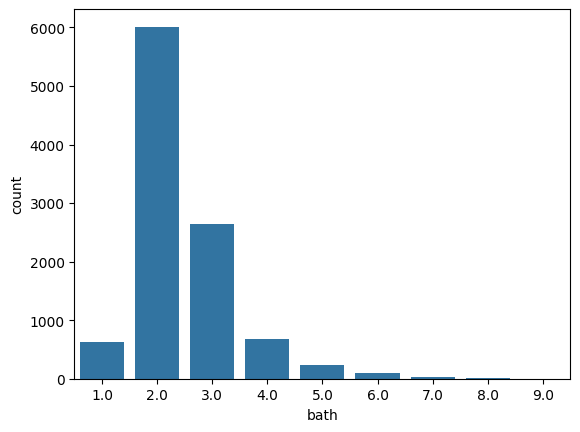

In [80]:
sns.countplot(x=df['bath'])
plt.show()

In [81]:
# Houses with more than 6 bathrooms are uncommon, so they will be removed from the dataset.
df = df[df['bath'] <= 6].copy()

In [82]:
# Ensuring that the number of bathrooms does not exceed BHK + 2
df = df[df['bath'] <= df['BHK'] + 2].copy()

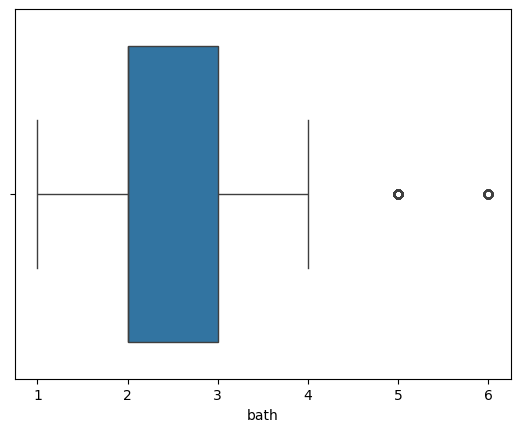

In [83]:
sns.boxplot(x=df['bath'])
plt.show()

In [84]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10287.000000,10287.000000,10287.000000,10287.000000,10287.000000
mean,1491.338360,2.437737,90.257877,2.543696,5658.463876
std,837.874008,0.871027,82.457900,0.793476,2258.106894
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1107.000000,2.000000,48.950000,2.000000,4242.179863
50%,1280.000000,2.000000,67.000000,2.000000,5176.565008
75%,1645.000000,3.000000,100.000000,3.000000,6428.780162
max,30400.000000,6.000000,2100.000000,7.000000,24509.803922


In [85]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
500,Anekal,420.0,1.0,12.5,1,2976.190476
1761,Dasarahalli,1160.0,2.0,49.0,2,4224.137931


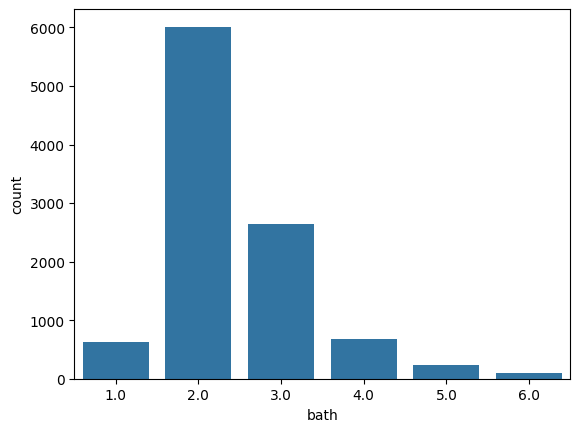

In [86]:
sns.countplot(x=df['bath'])
plt.show()

In [87]:
# Dropping the price_per_sqft column as it will no longer be used in further analysis.
df.drop(columns=['price_per_sqft'], inplace=True)

In [88]:
df.sample(3)

,location,total_sqft,bath,price,BHK
8899,other,435.0,1.0,19.5,1
5775,Raja Rajeshwari Nagar,1500.0,3.0,88.0,3
4280,Kannamangala,1536.0,3.0,104.0,3


In [89]:
df.shape

(10287, 5)

In [90]:
df.to_csv('Cleaned_data.csv')

<h1>Model Building:</h1>
<h3>datasets is cleaned</h3>

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score

In [92]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price']),df['price'],test_size=.2,random_state=2)

In [93]:
X_train.sample(3)

,location,total_sqft,bath,BHK
2080,Electronic City,1470.0,2.0,3
437,Anandapura,1576.0,3.0,3
9799,other,1050.0,2.0,2


Apply linear regression 

In [94]:
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(drop='first',sparse_output=False,dtype=int,handle_unknown='ignore'),['location'])
],remainder='passthrough')

In [95]:
scaler=StandardScaler()

In [96]:
lr=LinearRegression()

In [97]:
pipe=make_pipeline(one_hot_transformer,scaler,lr)

In [98]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [99]:
y_pred = pipe.predict(X_test)

In [100]:
r2_score(y_test,y_pred)

0.801718286031115

<h2>Applying Lasso:</h2>

In [101]:
lasso = Lasso()

In [102]:
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)

In [103]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [104]:
y_pred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.7978587601178185

<h2>Applying Ridge:</h2>

In [105]:
ridge = Ridge()

In [106]:
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)

In [107]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [108]:
y_pred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8017480078522303

In [109]:
print("LinearRegression r2_score: ",r2_score(y_test,y_pred))
print("LassoRegression r2_score: ",r2_score(y_test,y_pred_lasso))
print("RidgeRegression r2_score: ",r2_score(y_test,y_pred_ridge))

LinearRegression r2_score:  0.801718286031115
LassoRegression r2_score:  0.7978587601178185
RidgeRegression r2_score:  0.8017480078522303


In [110]:
import pickle

In [111]:
with open("bangalore_house_price_model.pkl","wb") as file:
    pickle.dump(pipe_ridge, file)